# Introducción al método K-Fold (Markdown)


##  3.2. Validación Cruzada K-Fold

La validación cruzada K-Fold es una de las técnicas más utilizadas para evaluar modelos de Machine Learning.  
Es más robusta que la retención simple (Holdout) porque **aprovecha todo el dataset**, entrenando y validando múltiples veces sobre diferentes particiones.

### ¿Cómo funciona?

1. Divide el dataset en **K partes iguales** (folds).
2. Entrena el modelo **K veces**, usando K−1 folds como entrenamiento y 1 como prueba en cada iteración.
3. Al final, se **promedian los resultados** obtenidos.

### Ejemplo clásico: K = 5
- El modelo se entrena 5 veces con diferentes divisiones del dataset.
- Cada vez se usa un 80% para entrenamiento y un 20% para prueba, pero con diferentes observaciones.

### Ventajas:
- Utiliza todos los datos para entrenar y validar.
- Resultados más **estables** y representativos.

Cuanto mayor sea K, mayor será la precisión... pero también **aumentará el tiempo de cómputo**.


# Entrenamiento con K-Fold

# Importar las funciones necesarias

In [29]:
# Paso 1: Importar las funciones necesarias
from sklearn.model_selection import cross_val_score, KFold       # Validación cruzada K-Fold
from sklearn.linear_model import LinearRegression                 # Modelo base: regresión lineal
from sklearn.datasets import make_regression                     # Para generar un dataset sintético

# Crear un dataset artificial para regresión

In [30]:
# Paso 2: Crear un dataset artificial para regresión
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Crear el modelo

In [31]:

# Paso 3: Crear el modelo
modelo = LinearRegression()

# Definir el esquema de validación cruzada con 5 folds

Mezclamos los datos antes de dividirlos para que los pliegues sean más variados


In [32]:
# Paso 4: Definir el esquema de validación cruzada con 5 folds

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Evaluar el modelo con cross_val_score
Usamos R² como métrica para interpretar qué tan bien predice el modelo (0 a 1)

In [33]:
# Paso 5: Evaluar el modelo con cross_val_score

scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')

# Mostrar los resultados de cada fold

In [34]:

# Paso 6: Mostrar los resultados de cada fold
print("Resultados por fold (R²):", scores)

Resultados por fold (R²): [0.946436   0.9092964  0.93610963 0.94469709 0.93104444]


# Calcular el promedio de R²

In [35]:
# Paso 7: Calcular el promedio de R²
print(f"Promedio R²: {scores.mean():.2f}")

Promedio R²: 0.93


# Explicación de los resultados
###  Interpretación de los resultados

El modelo se evaluó 5 veces, cada vez con un conjunto diferente de datos de prueba.

- **Resultados por fold:** indican el rendimiento del modelo en cada iteración.  
- **Promedio R²:** es una estimación más realista y confiable del desempeño general del modelo.

 Esta técnica reduce el riesgo de que una sola división del dataset (como ocurre en Holdout) distorsione la evaluación del modelo.

 **R² (coeficiente de determinación)** mide qué tan bien se ajusta el modelo a los datos. Su valor va de 0 a 1:
- 0 = el modelo no explica nada
- 1 = el modelo explica perfectamente los datos

Un valor intermedio (ej. 0.85) indica un buen ajuste.


### Visualización de los folds en K-Fold Cross Validation

Cada fila en la imagen representa una de las 5 divisiones (folds).  
Los cuadrados:

- 🟦 **Azules** representan los datos usados para **entrenar** el modelo en esa iteración.
- 🟧 **Naranjas** representan los datos usados para **evaluar (test)** el modelo.

Observa cómo en cada ciclo se usa una parte diferente del dataset como conjunto de prueba.  
Al final, **todos los datos fueron usados exactamente una vez para validar**, y varias veces para entrenar.

Esto permite una evaluación más robusta y representativa del modelo.


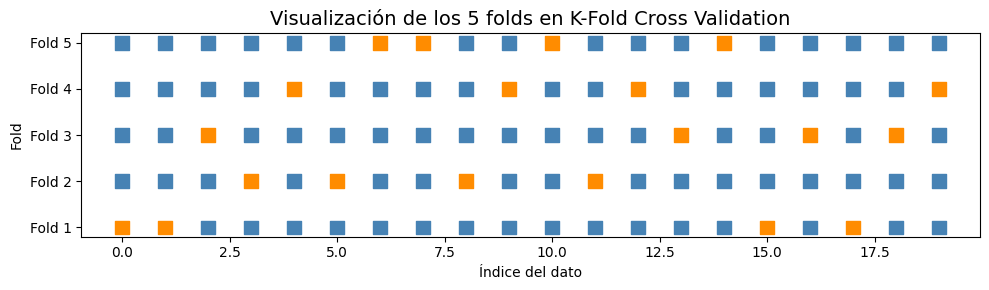

In [36]:
# Paso 8: Visualizar la división de los folds en K-Fold Cross Validation

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Número total de datos
n_muestras = 20  # Usamos 20 para que la visualización sea clara
X_demo = np.arange(n_muestras).reshape(-1, 1)
y_demo = np.random.rand(n_muestras)

# Configurar K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear la figura
plt.figure(figsize=(10, 3))
plt.title("Visualización de los 5 folds en K-Fold Cross Validation", fontsize=14)

# Dibujar cada split
for i, (train_index, test_index) in enumerate(kfold.split(X_demo)):
    # Poner todos los puntos en gris
    colores = np.full(n_muestras, 'lightgray', dtype=object)  # dtype=object es clave para colores tipo str

    # Colorear entrenamiento en azul y prueba en naranja
    colores[train_index] = 'steelblue'
    colores[test_index] = 'darkorange'

    # Dibujar los puntos como barras horizontales
    plt.scatter(range(n_muestras), [i]*n_muestras, c=colores, s=100, marker='s')

# Etiquetas y estilos
plt.xlabel("Índice del dato")
plt.ylabel("Fold")
plt.yticks(range(5), [f'Fold {i+1}' for i in range(5)])
plt.grid(False)
plt.tight_layout()
plt.show()
